### SEM -> Reflectance

- SEM 이미지중 texture 이미지 파일로만 Test 진행.
- 이미지 사이즈는 너무 큰데, 개수는 너무 적음 -> CNN, Transformer based 딥러닝은 불가

-> 이미지 테두리 자르고(글자때문) 이미지 grayscale에 존재하는 brightness mean 값을 대신 이용

- mean + wavelength -> reflectance로 automl 모델 Training
- train으로는 앞의 20장
- test로는 뒤의 14장 사용
- 결과는 가장 아래 그래프와 이미지 참조

In [173]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd

In [174]:
#current directory

print(os.getcwd())

c:\Users\se99a\Documents\GitHub\Solar\SEM_to_Reflectance


(1920, 2560)


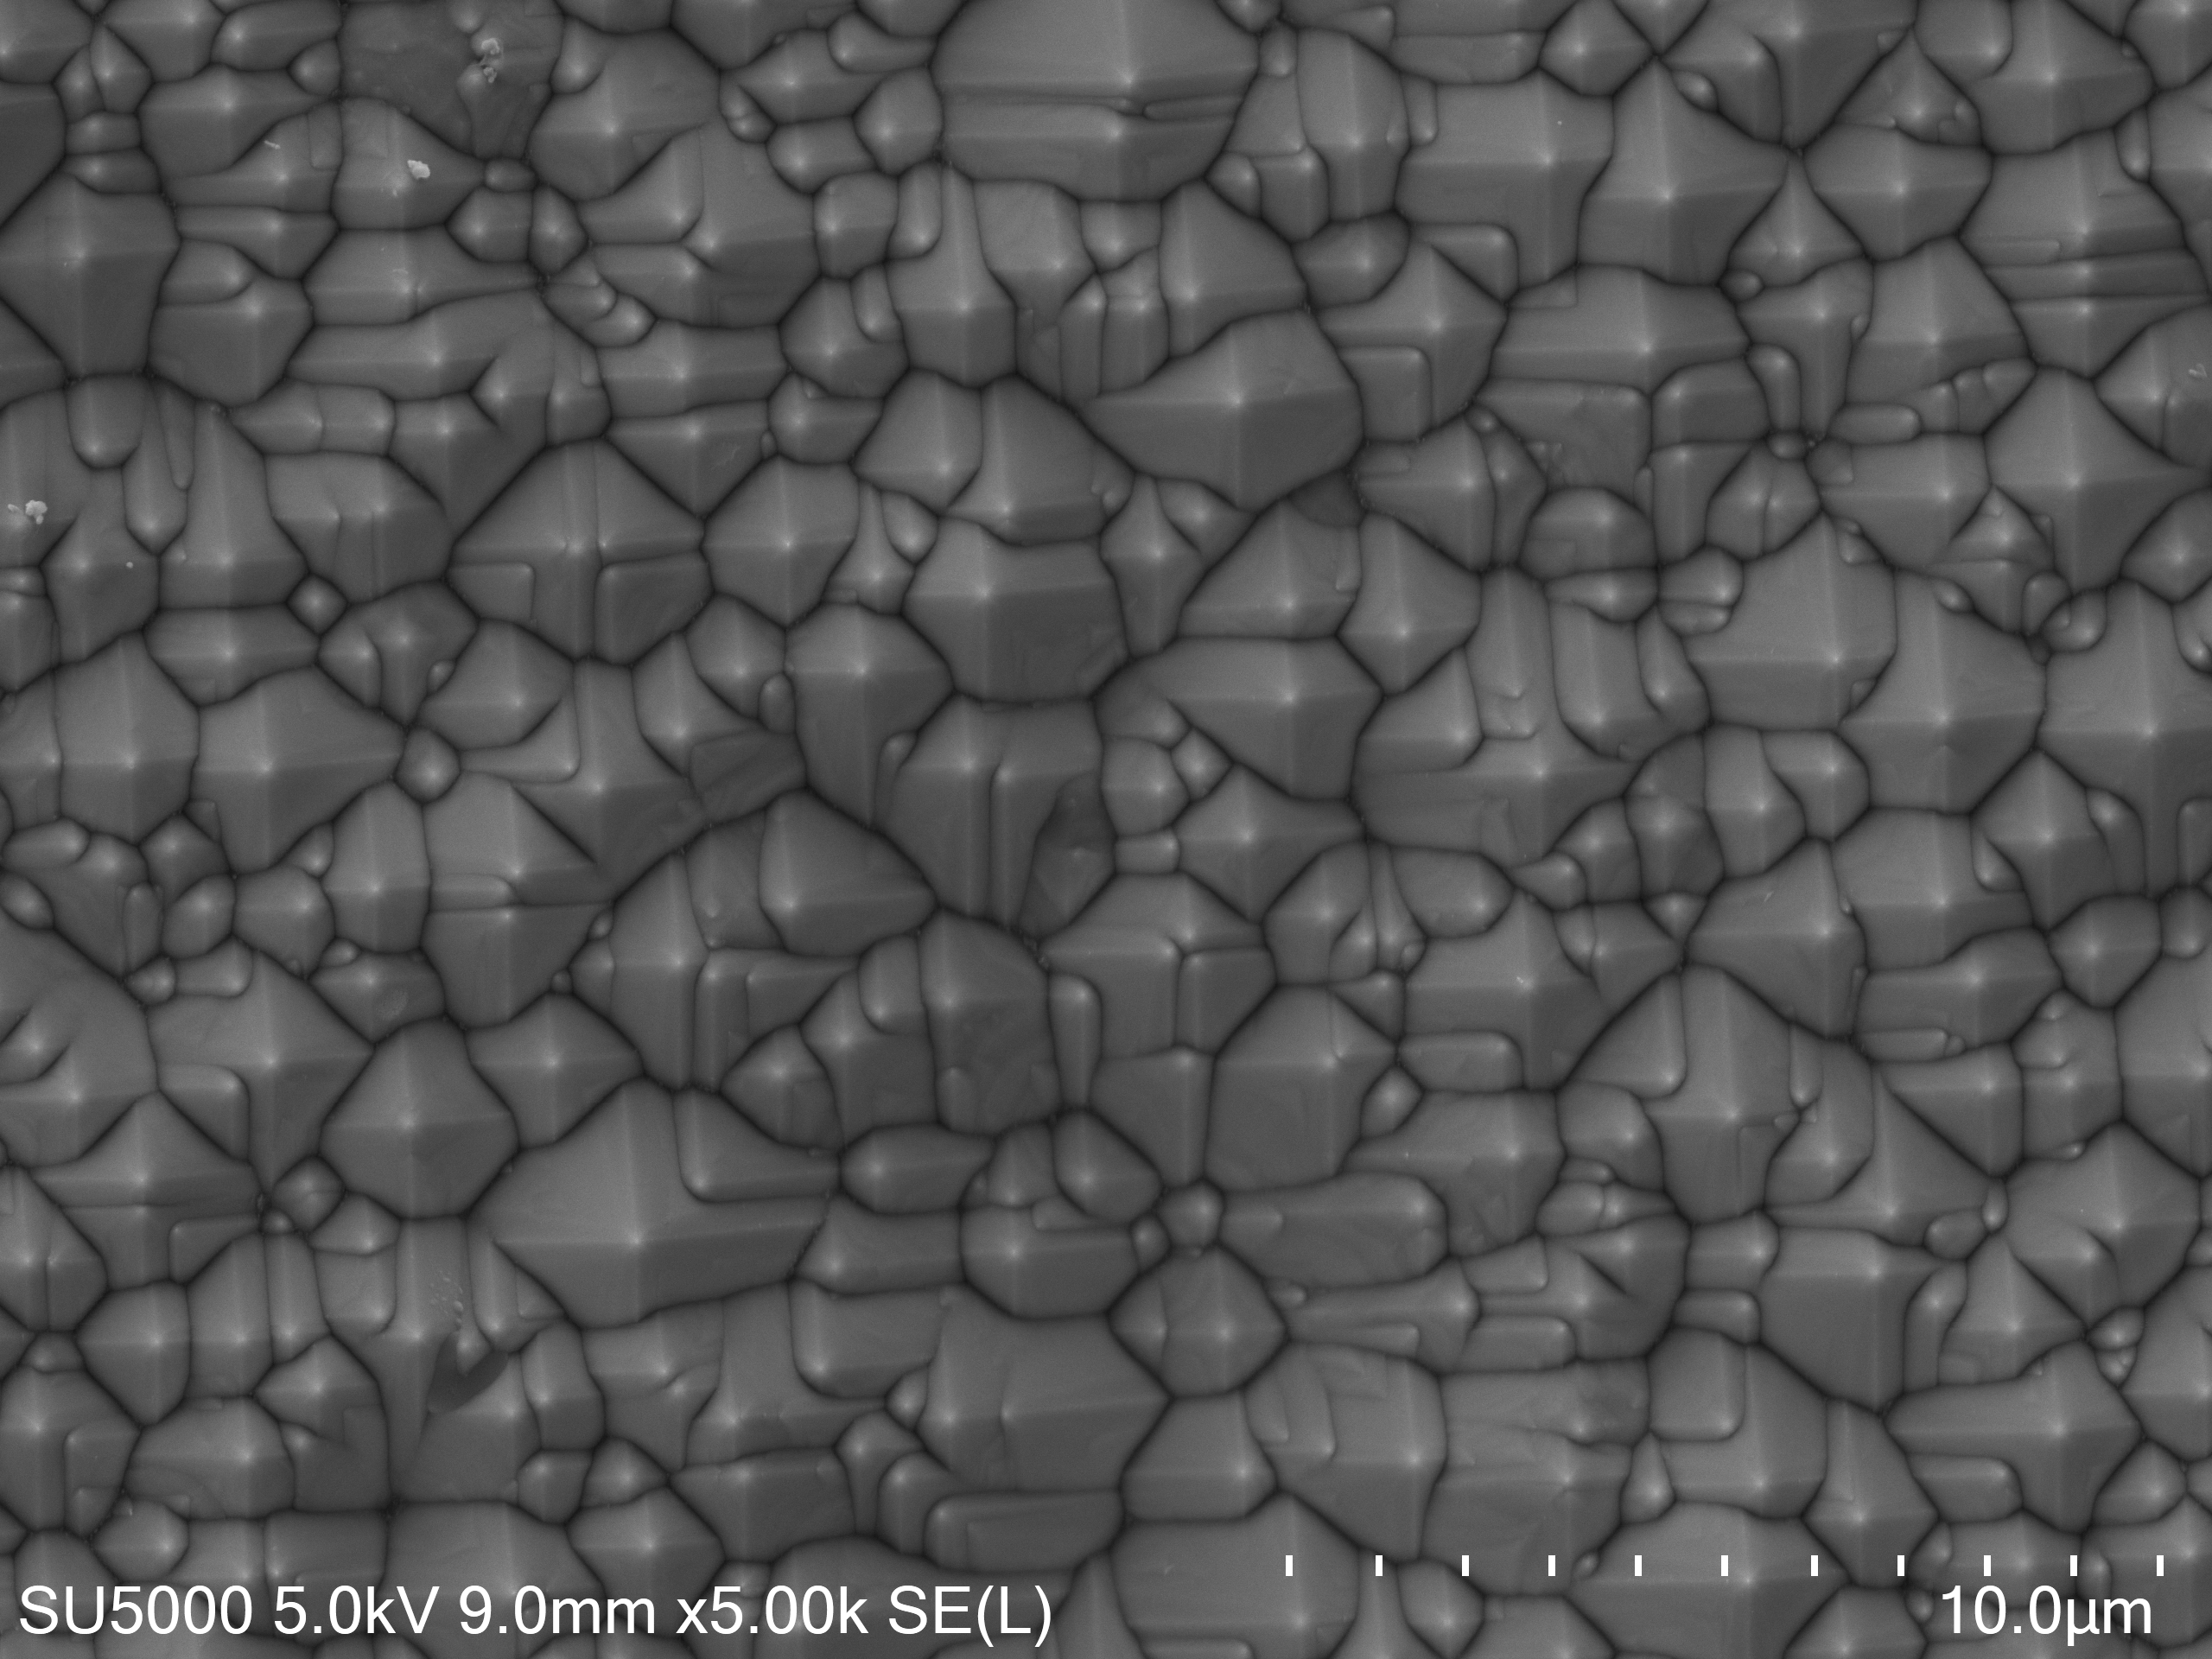

In [175]:
texture_path = 'Data\img\Sample03_Textured_No0001.bmp'

texture = Image.open(texture_path)
print(np.array(texture).shape)
texture

In [176]:
from torchvision import transforms
import torch.nn
import torch

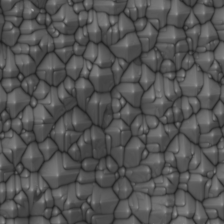

In [177]:
transform = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop(224),
])

texture = transform(texture)
texture

In [178]:
np.array(texture).mean() #흰색 비중이 높을수록 높지 않을까

83.9107740752551

In [179]:
num_texture = len(os.listdir('./Data/texture/'))
mean_texture_list = []
for i in range(num_texture):
    i +=1
    img = Image.open(f'Data\img\Sample03_Textured_No{i:04d}.bmp')
    img = transform(img)
    img = np.array(img)
    mean_texture = img.mean()
    mean_texture_list.append(mean_texture)

mean_texture_list[:5]

[83.9107740752551,
 85.08113440688776,
 83.76319355867346,
 84.2671197385204,
 80.74107142857143]

In [180]:
columns = pd.read_csv("./Data/texture/1-1.csv", header=None).T.loc[0]
data = pd.DataFrame(columns=columns)

for i in range(num_texture):
    i+=1
    if i%2 == 0:
        j = i//2 
        k = 2
    else:
        j = (i+1)//2
        k = 1
    data.loc[i-1] = pd.read_csv("./Data/texture/"+str(j)+"-"+str(k)+".csv", header=None).T.loc[1].values
data.head()

0   1200.0   1195.0   1190.0   1185.0   1180.0   1175.0   1170.0   1165.0  \
0  41.8527  41.8449  41.8154  41.7609  41.6859  41.5890  41.4720  41.3376   
1  42.0892  42.0798  42.0472  41.9921  41.9120  41.8125  41.6888  41.5471   
2  41.5127  41.5056  41.4781  41.4248  41.3506  41.2567  41.1425  41.0114   
3  42.2192  42.2112  42.1820  42.1342  42.0624  41.9695  41.8535  41.7159   
4  42.7200  42.7051  42.6644  42.5992  42.5034  42.3894  42.2474  42.0871   

0   1160.0   1155.0  ...   345.0    340.0    335.0    330.0    325.0   \
0  41.1911  41.0305  ...  51.8829  51.2698  51.3639  51.6046  52.0007   
1  41.3913  41.2226  ...  52.0456  51.5602  51.6369  51.8875  52.2395   
2  40.8637  40.7063  ...  51.6096  51.0829  51.1674  51.3883  51.7903   
3  41.5644  41.3955  ...  52.7068  52.4580  52.5436  52.8104  53.2062   
4  41.9106  41.7227  ...  52.0017  51.4921  51.6095  51.8643  52.2280   

0   320.0    315.0    310.0    305.0    300.0   
0  52.5555  53.2898  54.2993  55.7023  57.6777  
1  52.8066  53.5679  54.6012  56.0216  58.0217  
2  52.3506  53.0995  54.1127  55.5370  57.5210  
3  53.7588  54.5171  55.5751  57.0435  59.1051  
4  52.7781  53.5379  54.5601  55.9803  57.9567  

[5 rows x 181 columns]

In [181]:
data_2 = pd.concat([pd.DataFrame(mean_texture_list, columns=['mean_texture']), data], axis = 1)
data_2.head()

mean_texture   1200.0   1195.0   1190.0   1185.0   1180.0   1175.0  \
0     83.910774  41.8527  41.8449  41.8154  41.7609  41.6859  41.5890   
1     85.081134  42.0892  42.0798  42.0472  41.9921  41.9120  41.8125   
2     83.763194  41.5127  41.5056  41.4781  41.4248  41.3506  41.2567   
3     84.267120  42.2192  42.2112  42.1820  42.1342  42.0624  41.9695   
4     80.741071  42.7200  42.7051  42.6644  42.5992  42.5034  42.3894   

    1170.0   1165.0   1160.0  ...    345.0    340.0    335.0    330.0  \
0  41.4720  41.3376  41.1911  ...  51.8829  51.2698  51.3639  51.6046   
1  41.6888  41.5471  41.3913  ...  52.0456  51.5602  51.6369  51.8875   
2  41.1425  41.0114  40.8637  ...  51.6096  51.0829  51.1674  51.3883   
3  41.8535  41.7159  41.5644  ...  52.7068  52.4580  52.5436  52.8104   
4  42.2474  42.0871  41.9106  ...  52.0017  51.4921  51.6095  51.8643   

     325.0    320.0    315.0    310.0    305.0    300.0  
0  52.0007  52.5555  53.2898  54.2993  55.7023  57.6777  
1  52.2395  52.8066  53.5679  54.6012  56.0216  58.0217  
2  51.7903  52.3506  53.0995  54.1127  55.5370  57.5210  
3  53.2062  53.7588  54.5171  55.5751  57.0435  59.1051  
4  52.2280  52.7781  53.5379  54.5601  55.9803  57.9567  

[5 rows x 182 columns]

In [182]:
data_3 = pd.DataFrame(columns = ['mean_texture','wavelength','reflectance'])
data_3

Empty DataFrame
Columns: [mean_texture, wavelength, reflectance]
Index: []

In [183]:
for i in range(len(data_2)):
    for j in range(len(data_2.columns)-1):
        data_3.loc[i*(len(data_2.columns)-1)+j] = [data_2['mean_texture'][i], data_2.columns[j+1], data_2.iloc[i,j+1]]
        
data_3.head()

mean_texture  wavelength  reflectance
0     83.910774      1200.0      41.8527
1     83.910774      1195.0      41.8449
2     83.910774      1190.0      41.8154
3     83.910774      1185.0      41.7609
4     83.910774      1180.0      41.6859

In [184]:
20*len(data_2.columns)-20

3620

In [185]:
train_X = data_3.iloc[:20*len(data_2.columns)-20,0:2]
train_y = data_3.iloc[:20*len(data_2.columns)-20,2]

test_X = data_3.iloc[20*len(data_2.columns)-20:,0:2]
test_y = data_3.iloc[20*len(data_2.columns)-20:,2]

In [186]:
#import tpot
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42, cv = 5, n_jobs=-1)

tpot.fit(train_X, train_y)

tpot.score(test_X, test_y)

tpot.export('tpot_texture_pipeline.py')

y_pred  = tpot.predict(test_X)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6135201782629686

Generation 2 - Current best internal CV score: -0.6135201782629686

Generation 3 - Current best internal CV score: -0.6135201782629686

Generation 4 - Current best internal CV score: -0.586641732300846

Generation 5 - Current best internal CV score: -0.586641732300846

Best pipeline: KNeighborsRegressor(SelectFromModel(input_matrix, max_features=0.8, n_estimators=100, threshold=0.7000000000000001), n_neighbors=79, p=1, weights=distance)


In [187]:
y_test = test_y.values

In [188]:
y_pred

array([41.9145  , 41.906335, 41.875375, ..., 54.413735, 55.835345,
       57.82236 ])

In [189]:
mse = ((y_pred - y_test)**2).mean()
print('mse', mse)

mse 2.5696441929459155


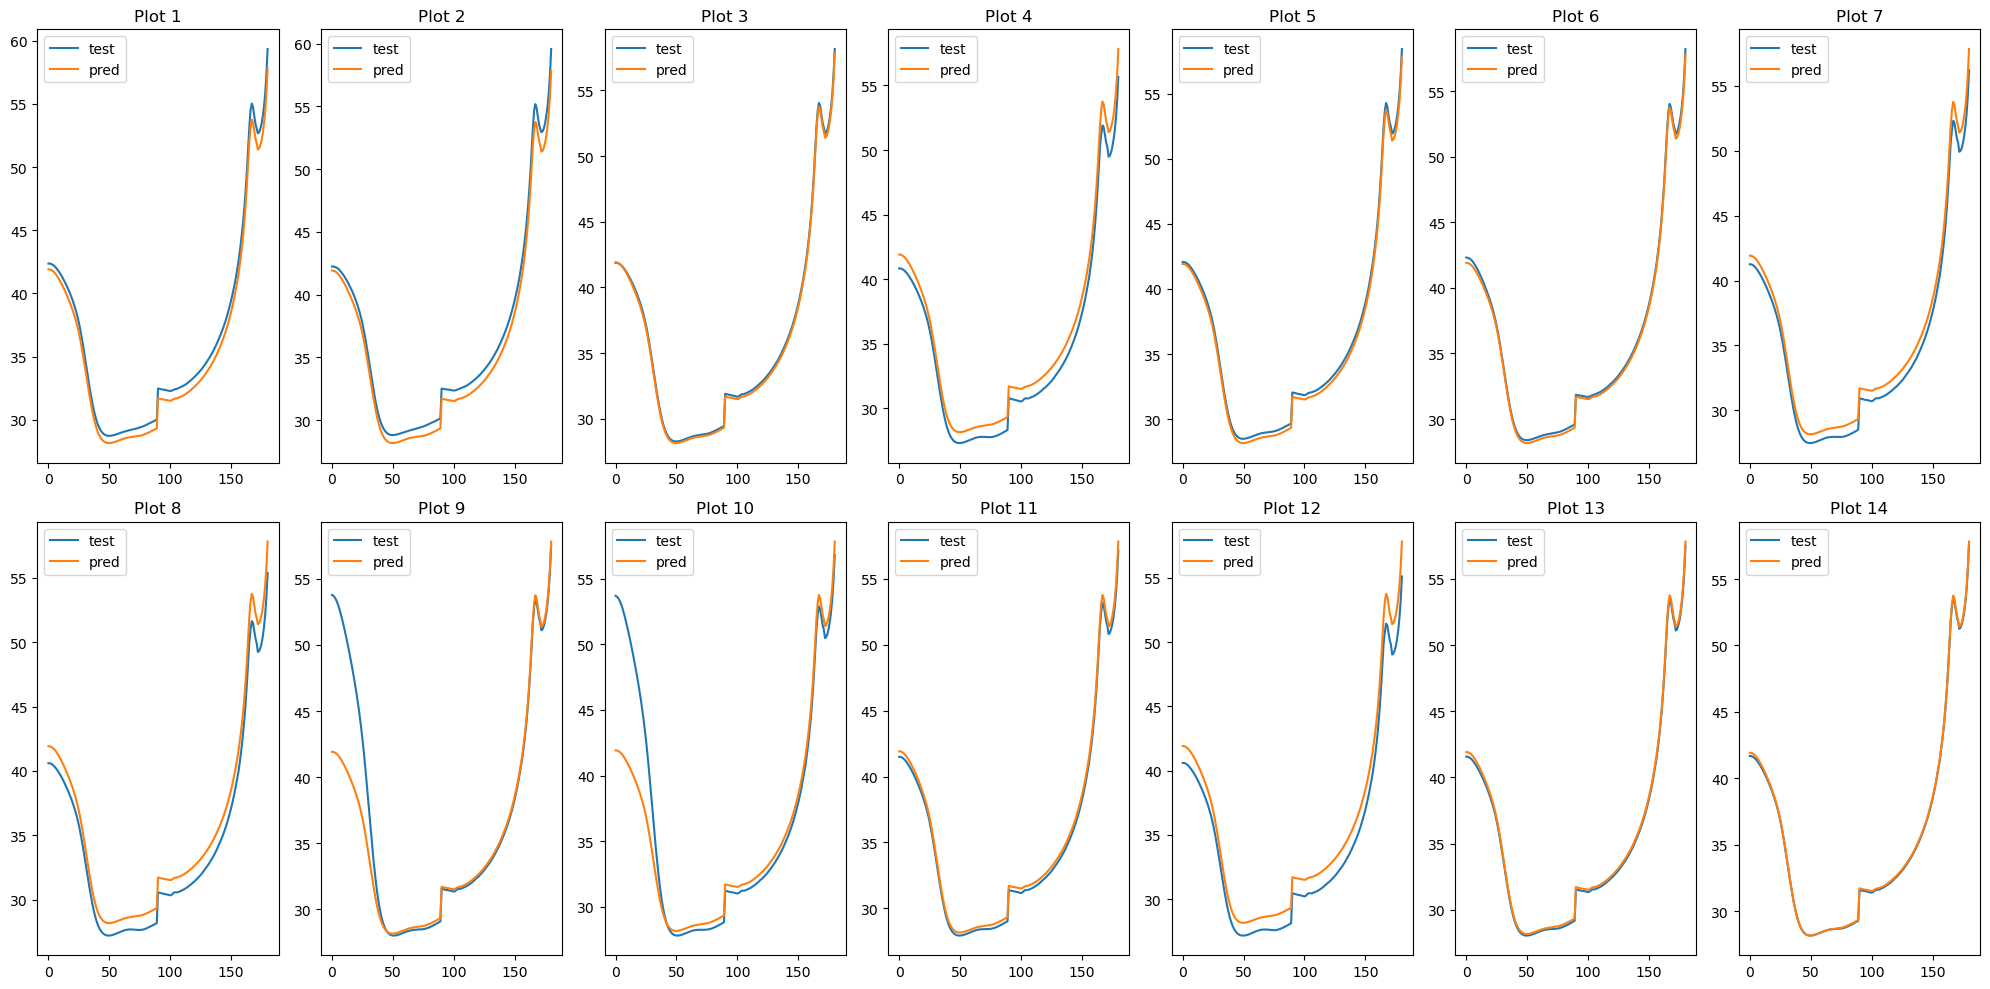

In [190]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

# Plotting the first set of data
for i in range(14):
    j = i//7
    k = i%7
    axs[j, k].plot(y_test[i*181:(i+1)*181], label='test')
    axs[j, k].plot(y_pred[i*181:(i+1)*181], label='pred')
    axs[j, k].set_title("Plot "+str(i+1))
    axs[j, k].legend()

# Adjusting the spacing between the plots
plt.tight_layout()

# Displaying the plots
plt.show()

- plot 9, 10, 12는 확실히 성능이 좋다고 보이지 않음. accuracy는 측정 불가 하지만 14개 중 3개 불량

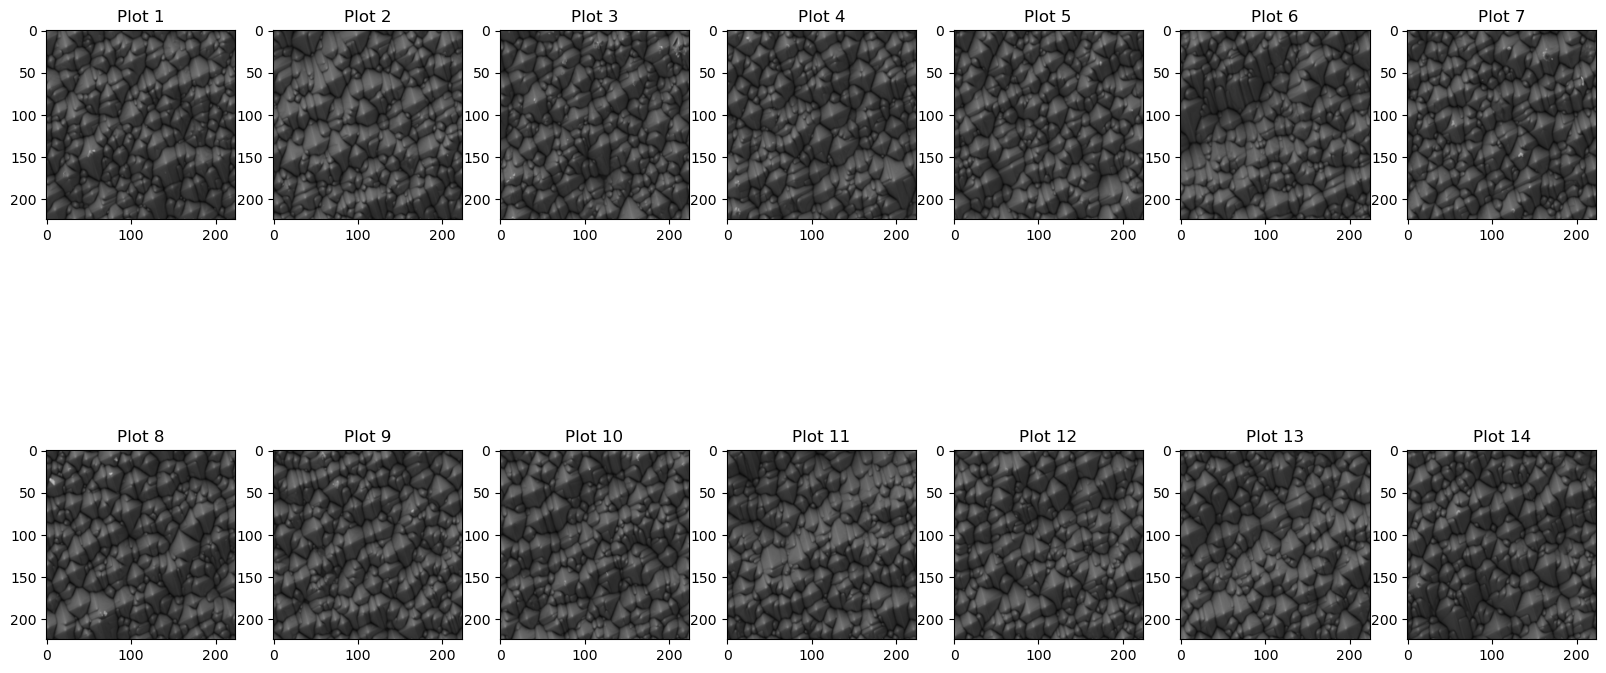

In [191]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))

for i in range(14):
    j = i//7
    k = i%7
    i += 21
    img = Image.open(f'Data\img\Sample03_Textured_No{i+1:04d}.bmp')
    img = transform(img)
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    axs[j, k].imshow(np.array(img))
    axs[j, k].set_title("Plot "+str(i-21+1))
    

해당 이미지 의미

In [196]:
result = pd.DataFrame([y_test, y_pred], index = ['y_test','y_pred']).T
result.to_csv('result.csv', index=False)
result

y_test     y_pred
0     42.3691  41.914500
1     42.3659  41.906335
2     42.3426  41.875375
3     42.2995  41.821080
4     42.2384  41.743625
...       ...        ...
2529  52.4921  52.654610
2530  53.2376  53.402615
2531  54.2392  54.413735
2532  55.6711  55.835345
2533  57.6577  57.822360

[2534 rows x 2 columns]